# 实现你的第一个神经网络，与之前实现的逻辑回归模型有很大的不同

## 1-导入相关包
- sklearn 提供了简单与高效的数据挖掘与数据分析的工具
- testCases 提供了一些测试实例来评估函数的正确性
- planar_utils 提供了该作业所需的各种有用函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

%matplotlib inline
np.random.seed(1)

## 2-数据集

In [2]:
X,Y=load_planar_dataset()
Y=np.squeeze(Y)

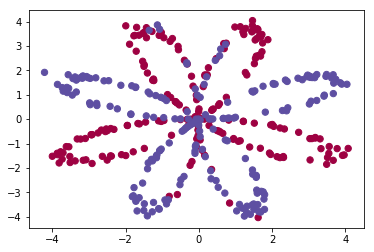

In [3]:
# 可视化数据集：
plt.scatter(X[0, :],X[1, :],c=Y,s=40,cmap=plt.cm.Spectral)
plt.show()

In [4]:
# X矩阵包含你的特征
# Y向量包含你的标签（red：0，blue：1）
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (400,)
I have m = 400 training examples!


## 3-简单逻辑回归

In [5]:
# Train the logistic regression classifier
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


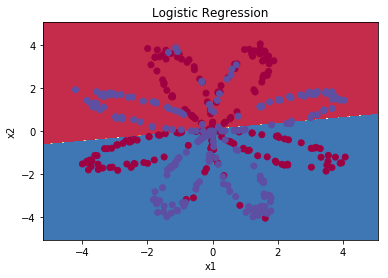

In [6]:
# 绘制出逻辑回归的判定边界
plot_decision_boundary(lambda x:clf.predict(x),X,Y)
plt.title('Logistic Regression')
# 显示准确率
LR_predictions=clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 4-神经网络

#### 4.1定义神经网络结构

In [7]:
def layer_sizes(X,Y):
    '''
    Arguments:
    X -- 输入数据集
    Y -- 标签
    Returns:
    n_x -- 输入层的大小
    n_h -- 隐藏层的大小
    n_y -- 输出层的大小
    '''
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

In [8]:
X_assess,Y_assess=layer_sizes_test_case()
(n_x,n_h,n_y)=layer_sizes(X_assess,Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


#### 4.2初始化模型参数

In [9]:
def initialize_parameter(n_x,n_h,n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)
    W1=np.random.randn(n_h,n_x)*0.01  # ×0.01为的是使权重矩阵的值较小，之后在计算sigmoid（Z）时，使的Z的值在0的附件，此时其变化率
                                     # 最高，则在进行梯度下降时下降速度能更快，使训练过程提速
    b1=np.zeros((n_h,1))  # 创建全0的矩阵时，注意用（）来括起矩阵的形状
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return parameters
    

In [10]:
n_x,n_h,n_y=initialize_parameters_test_case()
parameters=initialize_parameter(n_x,n_h,n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


#### 4.3循环

In [11]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1=parameters['W1']
    W2=parameters['W2']
    b1=parameters['b1']
    b2=parameters['b2']
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    cache={
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2
    }
    return A2,cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [13]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2

    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m=Y.shape[1]
    logprobs=np.multiply(np.log(A2),Y)+np.log(1-A2)*(1-Y)
    cost=(-1/m)*np.sum(logprobs)
    
    return cost

In [14]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [15]:
# 反向传播
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1.0/m*np.dot(dZ2, A1.T)
    db2 = 1.0/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1.0/m*np.dot(dZ1, X.T)
    db1 = 1.0/m*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [17]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


#### 4.4 实现一个浅层的神经网络模型

In [19]:
 def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    # 加入对随机矩阵的控制
    np.random.seed(3)
    # 确定输入层的神经元个数，输出层的神经元个数，隐藏层默认为4个
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    # 初始化权重矩阵W1,2和b1,2，W的内容为随机的，b为0
    # 每个W和b都是不同的，每个W和b的矩阵的大小由所在的层与下一层的神经元个数决定为W:(Lout,Lin);b:(Lout,1)
    parameters=initialize_parameter(n_x,n_h,n_y)
    # 取得初始化的W和b的矩阵，加上输入层总共3层的神经网络，有2组W和b
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    # 迭代执行神经网络中的梯度下降
    for i in range(num_iterations):
        # 首先先正向传播
        A2,cache=forward_propagation(X,parameters)
        # 计算cost函数
        cost=compute_cost(A2,Y,parameters)
        # 开始反向传播得到W和b的偏微分
        grads=backward_propagation(parameters,cache,X,Y)
        # 开始梯度下降更新W和b参数
        parameters=update_parameters(parameters,grads)
        # 记录没一千次迭代的信息
        if i%1000==0 and print_cost:
            print('迭代 %i 次时成本函数cost的结果: %f'%(i,cost))
    
    return parameters
    

In [20]:
# 测试我的只有两层的神经网络模型
X_assess,Y_assess=nn_model_test_case()
print('X:'+str(X_assess)+'\n'+'Y:'+str(Y_assess))

X:[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
Y:[[ True False  True]]


In [21]:
parameters=nn_model(X_assess,Y_assess,4,print_cost=True)

迭代 0 次时成本函数cost的结果: 0.692739
迭代 1000 次时成本函数cost的结果: 0.000218
迭代 2000 次时成本函数cost的结果: 0.000107
迭代 3000 次时成本函数cost的结果: 0.000071
迭代 4000 次时成本函数cost的结果: 0.000053
迭代 5000 次时成本函数cost的结果: 0.000042
迭代 6000 次时成本函数cost的结果: 0.000035
迭代 7000 次时成本函数cost的结果: 0.000030
迭代 8000 次时成本函数cost的结果: 0.000026
迭代 9000 次时成本函数cost的结果: 0.000023


#### 4.5预测函数

In [22]:
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    return (A2>0.5)

迭代 0 次时成本函数cost的结果: 0.693048
迭代 1000 次时成本函数cost的结果: 0.288083
迭代 2000 次时成本函数cost的结果: 0.254385
迭代 3000 次时成本函数cost的结果: 0.233864
迭代 4000 次时成本函数cost的结果: 0.226792
迭代 5000 次时成本函数cost的结果: 0.222644
迭代 6000 次时成本函数cost的结果: 0.219731
迭代 7000 次时成本函数cost的结果: 0.217504
迭代 8000 次时成本函数cost的结果: 0.219467
迭代 9000 次时成本函数cost的结果: 0.218561


Text(0.5,1,'Decision Boundary for hidden layer size4')

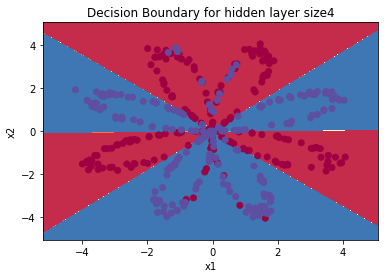

In [23]:
parameters=nn_model(X,Y.reshape(1,400),4,print_cost=True)
# nn_model(X,Y,4,print_cost=True)
# 画一个判定边界
plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y)
plt.title("Decision Boundary for hidden layer size"+str(4))

In [26]:
# print accuracy
predictions=predict(parameters,X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%
